# Analyse Exploratoire
## Prédiction des moments de vie

Ce notebook effectue une analyse exploratoire complète des données bancaires et construit un modèle baseline de prédiction des moments de vie.

## 1. Imports et Configuration

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore")

# Configuration graphiques
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
%matplotlib inline

print(" Imports réussis")

 Imports réussis


## 2. Chargement des Données

In [21]:
print(" Chargement des données...")
clients_df = pd.read_csv("../data/clients_data.csv")
life_events_df = pd.read_csv("../data/life_events.csv")

print(f"    {len(clients_df):,} clients chargés")
print(f"    {len(life_events_df):,} événements chargés")

print("\n Aperçu des données clients:")
display(clients_df.head())

print("\n Aperçu des événements:")
display(life_events_df.head())

 Chargement des données...
    10,000 clients chargés
    1,745 événements chargés

 Aperçu des données clients:


,client_id,age,genre,situation_familiale,nb_enfants,csp,region,anciennete_banque_mois,revenu_mensuel,epargne_totale,...,nb_appels_conseiller_6mois,nb_visites_agence_6mois,recherche_pret_perso_recent,augmentation_epargne_recente,ouverture_compte_epargne_recent,consultation_assurance_vie,simulation_pret_immobilier,variation_revenus_recente,consultation_placements,consultation_pret_pro
0,CLI_000001,51,H,marie,0,ouvrier,IDF,46,2340.875490,36185.721244,...,0,1,0,0,0,0,0,0,0,0
1,CLI_000002,30,H,celibataire,1,employe,IDF,76,3488.229435,27063.294343,...,0,0,0,0,0,0,0,0,0,0
2,CLI_000003,37,H,divorce,1,etudiant,Autre,56,831.133826,22003.780519,...,0,2,0,0,0,0,0,0,0,0
3,CLI_000004,46,F,marie,2,cadre,IDF,310,3990.968188,86641.514165,...,0,1,0,0,0,0,0,0,0,0
4,CLI_000005,46,F,marie,0,cadre,IDF,207,3431.919432,130216.176674,...,2,1,0,1,0,0,0,0,0,0



 Aperçu des événements:


,client_id,moment_de_vie,date_evenement,horizon_prediction
0,CLI_000005,achat_immobilier,2023-01-17,12_mois
1,CLI_000013,deces_proche,2023-12-08,12_mois
2,CLI_000014,mariage,2023-02-08,12_mois
3,CLI_000024,achat_immobilier,2023-06-13,12_mois
4,CLI_000024,changement_emploi,2023-06-30,12_mois


## 3. Analyse Exploratoire

In [22]:
print(" ANALYSE EXPLORATOIRE")
print("=" * 70)

print("\n1. Vue d'ensemble des données clients:")
display(clients_df.describe())

 ANALYSE EXPLORATOIRE

1. Vue d'ensemble des données clients:


,age,nb_enfants,anciennete_banque_mois,revenu_mensuel,epargne_totale,credits_en_cours,nb_produits_bancaires,utilise_app_mobile,nb_connexions_mois,montant_moyen_transactions,...,nb_appels_conseiller_6mois,nb_visites_agence_6mois,recherche_pret_perso_recent,augmentation_epargne_recente,ouverture_compte_epargne_recent,consultation_assurance_vie,simulation_pret_immobilier,variation_revenus_recente,consultation_placements,consultation_pret_pro
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.743400,1.246500,65.172100,2936.318512,35139.581562,0.746600,2.708800,0.693600,10.714800,1506.809951,...,1.13820,0.750500,0.048700,0.088000,0.05590,0.052800,0.091500,0.080100,0.048200,0.040000
std,14.405031,1.163646,59.128656,1719.253231,46134.298677,0.886604,1.098874,0.461021,13.427028,773.041660,...,1.28991,0.884154,0.215251,0.283309,0.22974,0.223645,0.288333,0.271462,0.214199,0.195969
min,18.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,23.000000,1778.918614,7529.625473,0.000000,2.000000,0.000000,2.000000,960.059442,...,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,1.000000,47.000000,2475.443892,19874.309269,0.000000,3.000000,1.000000,6.000000,1500.548663,...,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,2.000000,89.000000,3692.781246,44381.145140,1.000000,4.000000,1.000000,15.000000,2032.182767,...,2.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,85.000000,4.000000,527.000000,11686.882683,807997.809165,3.000000,5.000000,1.000000,127.000000,5120.438640,...,5.00000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


2. Distribution des CSP:


csp
employe                3485
cadre                  2029
ouvrier                1497
retraite               1467
profession_liberale     985
etudiant                537
Name: count, dtype: int64

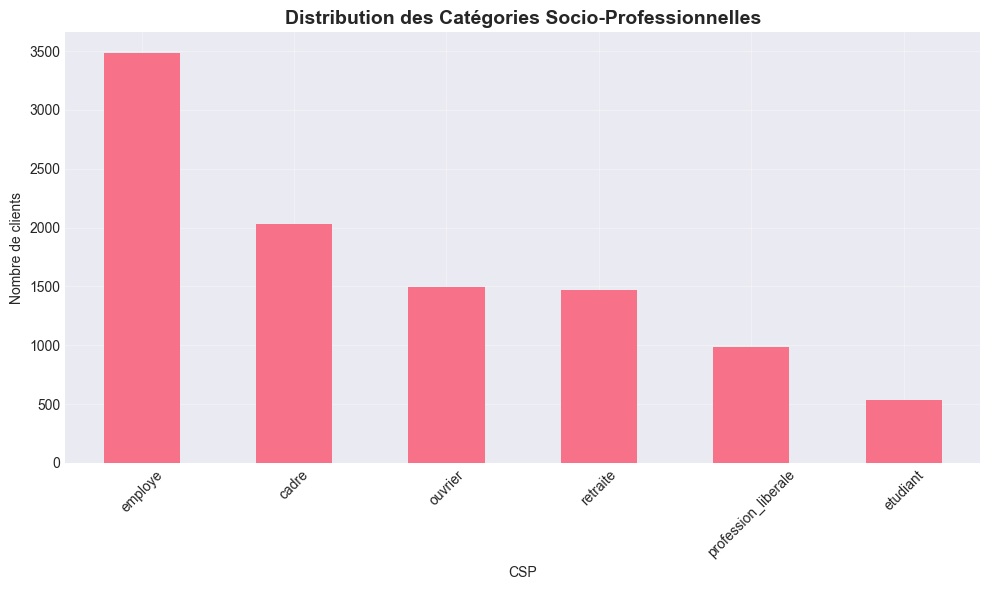

In [23]:
print("2. Distribution des CSP:")
csp_dist = clients_df["csp"].value_counts()
display(csp_dist)

# Visualisation
plt.figure(figsize=(10, 6))
csp_dist.plot(kind="bar")
plt.title(
    "Distribution des Catégories Socio-Professionnelles", fontsize=14, fontweight="bold"
)
plt.xlabel("CSP")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

3. Distribution des situations familiales:


situation_familiale
marie          4479
celibataire    3528
divorce        1502
veuf            491
Name: count, dtype: int64

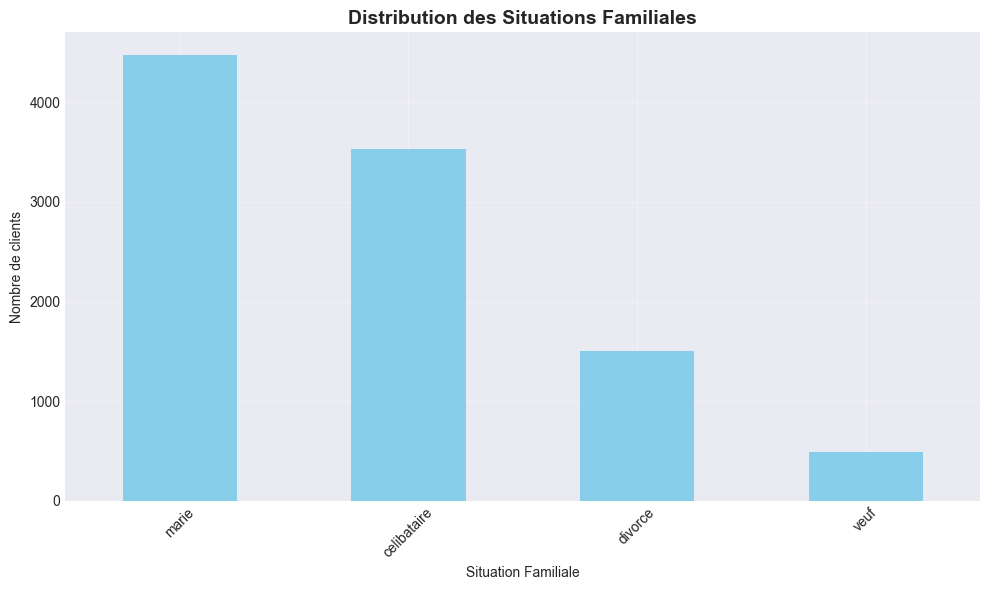

In [24]:
print("3. Distribution des situations familiales:")
sitfam_dist = clients_df["situation_familiale"].value_counts()
display(sitfam_dist)

# Visualisation
plt.figure(figsize=(10, 6))
sitfam_dist.plot(kind="bar", color="skyblue")
plt.title("Distribution des Situations Familiales", fontsize=14, fontweight="bold")
plt.xlabel("Situation Familiale")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Distribution des moments de vie:


moment_de_vie
changement_emploi      618
achat_immobilier       348
deces_proche           250
naissance              192
divorce                128
mariage                 99
creation_entreprise     83
retraite                27
Name: count, dtype: int64

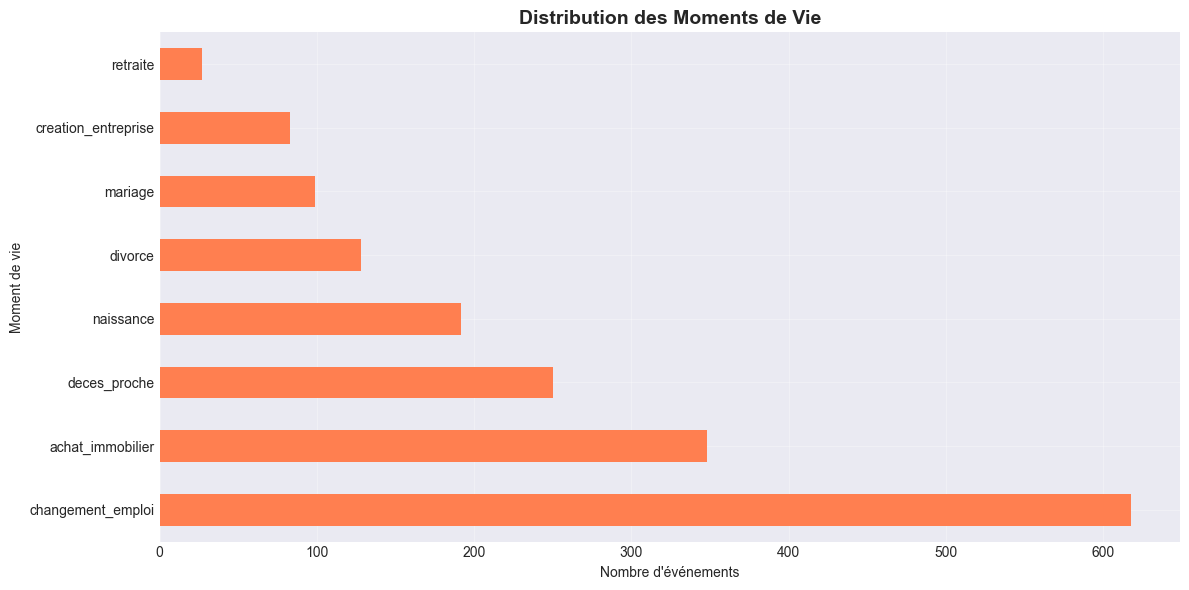

In [25]:
print("4. Distribution des moments de vie:")
event_counts = life_events_df["moment_de_vie"].value_counts()
display(event_counts)

# Visualisation
plt.figure(figsize=(12, 6))
event_counts.plot(kind="barh", color="coral")
plt.title("Distribution des Moments de Vie", fontsize=14, fontweight="bold")
plt.xlabel("Nombre d'événements")
plt.ylabel("Moment de vie")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
print("5. Analyse des corrélations (features numériques):")
numeric_cols = clients_df.select_dtypes(include=[np.number]).columns
correlation_matrix = clients_df[numeric_cols].corr()

# Extraire les corrélations sans la diagonale
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_pairs.append(
            {
                "feature1": correlation_matrix.columns[i],
                "feature2": correlation_matrix.columns[j],
                "correlation": abs(correlation_matrix.iloc[i, j]),
            }
        )

corr_df = pd.DataFrame(corr_pairs).sort_values("correlation", ascending=False)
print("\nTop 10 corrélations les plus fortes:")
display(corr_df.head(10))

5. Analyse des corrélations (features numériques):

Top 10 corrélations les plus fortes:


,feature1,feature2,correlation
60,revenu_mensuel,epargne_totale,0.443361
126,utilise_app_mobile,nb_connexions_mois,0.403895
212,augmentation_epargne_recente,simulation_pret_immobilier,0.138934
216,ouverture_compte_epargne_recent,consultation_assurance_vie,0.090481
225,simulation_pret_immobilier,variation_revenus_recente,0.045093
203,recherche_pret_perso_recent,augmentation_epargne_recente,0.039596
228,variation_revenus_recente,consultation_placements,0.038885
218,ouverture_compte_epargne_recent,variation_revenus_recente,0.031713
1,age,anciennete_banque_mois,0.029139
222,consultation_assurance_vie,variation_revenus_recente,0.028487


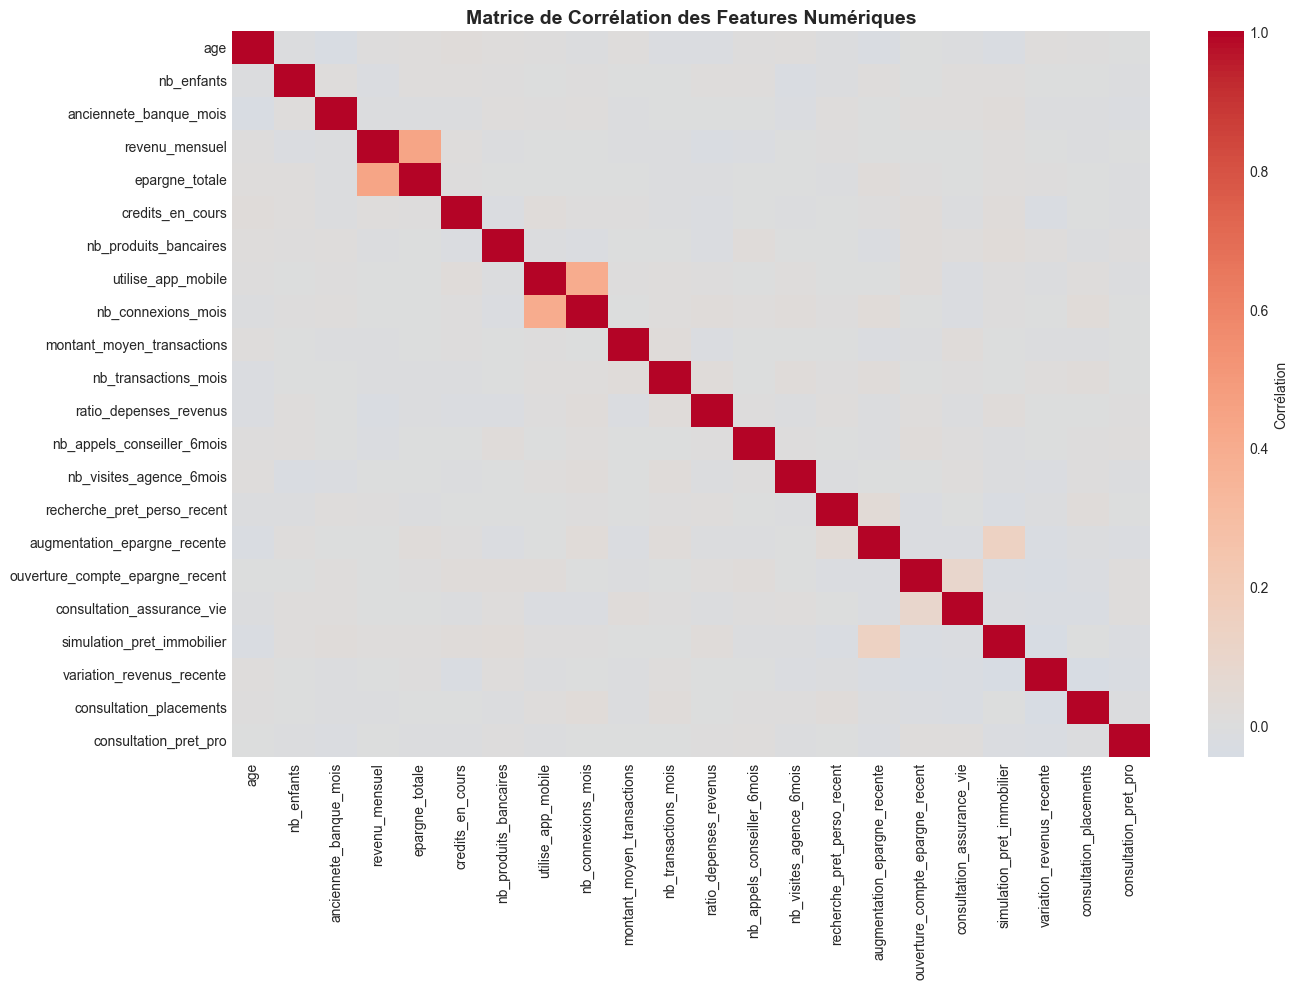

In [27]:
# Heatmap des corrélations
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    cbar_kws={"label": "Corrélation"},
)
plt.title(
    "Matrice de Corrélation des Features Numériques", fontsize=14, fontweight="bold"
)
plt.tight_layout()
plt.show()

## 4. Visualisations Complémentaires

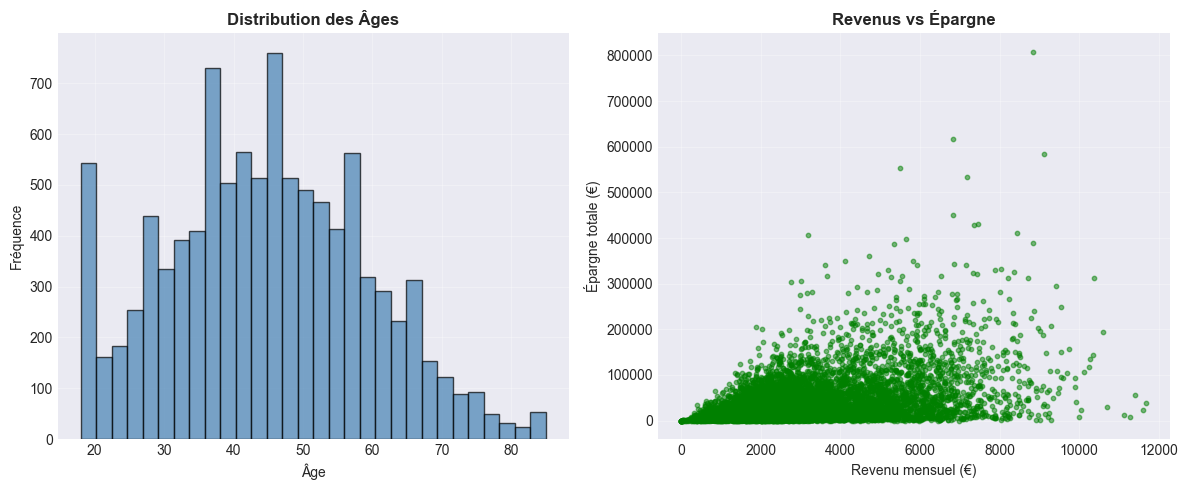

In [28]:
# Distribution des âges
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(clients_df["age"], bins=30, edgecolor="black", alpha=0.7, color="steelblue")
plt.title("Distribution des Âges", fontsize=12, fontweight="bold")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.grid(True, alpha=0.3)

# Revenus vs Épargne
plt.subplot(1, 2, 2)
plt.scatter(
    clients_df["revenu_mensuel"],
    clients_df["epargne_totale"],
    alpha=0.5,
    s=10,
    color="green",
)
plt.title("Revenus vs Épargne", fontsize=12, fontweight="bold")
plt.xlabel("Revenu mensuel (€)")
plt.ylabel("Épargne totale (€)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

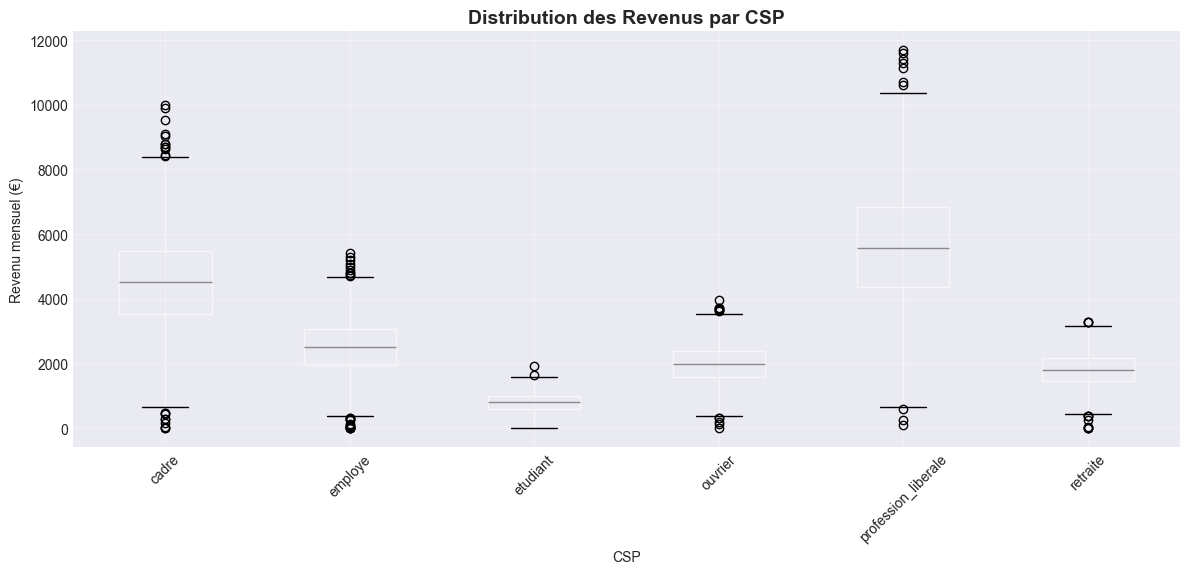

In [29]:
# Distribution des revenus par CSP
plt.figure(figsize=(12, 6))
clients_df.boxplot(column="revenu_mensuel", by="csp", figsize=(12, 6))
plt.title("Distribution des Revenus par CSP", fontsize=14, fontweight="bold")
plt.suptitle("")  # Supprimer le titre automatique
plt.xlabel("CSP")
plt.ylabel("Revenu mensuel (€)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Création de la Variable Cible

On va créer un modèle pour prédire l'achat immobilier comme exemple.

 Création de la variable cible pour: achat_immobilier

   Distribution de la cible:
   - Classe 0 (pas d'événement): 9,652 (96.5%)
   - Classe 1 (événement): 348 (3.5%)


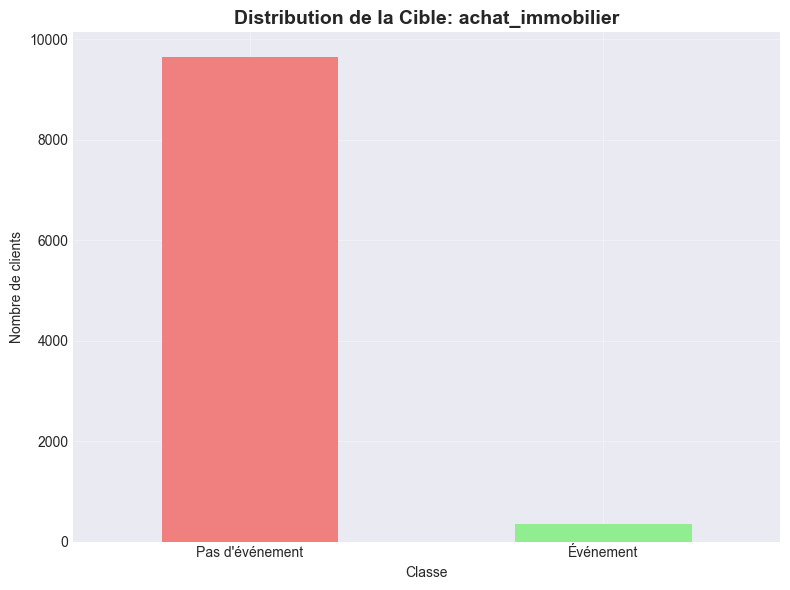

In [30]:
target_event = "achat_immobilier"
print(f" Création de la variable cible pour: {target_event}")

# Identifier les clients ayant vécu cet événement
target_clients = life_events_df[life_events_df["moment_de_vie"] == target_event][
    "client_id"
].unique()

# Créer la variable cible
clients_df["target"] = clients_df["client_id"].isin(target_clients).astype(int)

# Distribution de la cible
target_dist = clients_df["target"].value_counts()
print(f"\n   Distribution de la cible:")
print(
    f"   - Classe 0 (pas d'événement): {target_dist[0]:,} ({target_dist[0] / len(clients_df) * 100:.1f}%)"
)
print(
    f"   - Classe 1 (événement): {target_dist[1]:,} ({target_dist[1] / len(clients_df) * 100:.1f}%)"
)

# Visualisation
plt.figure(figsize=(8, 6))
target_dist.plot(kind="bar", color=["lightcoral", "lightgreen"])
plt.title(f"Distribution de la Cible: {target_event}", fontsize=14, fontweight="bold")
plt.xlabel("Classe")
plt.ylabel("Nombre de clients")
plt.xticks([0, 1], ["Pas d'événement", "Événement"], rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 6. Preprocessing des Données

In [31]:
print(" Preprocessing des données...")

# Séparer features et target
target = clients_df["target"]
features_df = clients_df.drop(["client_id", "target"], axis=1)

# Encoder les variables catégorielles
categorical_cols = features_df.select_dtypes(include=["object"]).columns
print(f"   Encodage de {len(categorical_cols)} variables catégorielles...")

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    features_df[col] = le.fit_transform(features_df[col])
    le_dict[col] = le

# Normalisation des features numériques
print("   Normalisation des features numériques...")
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)
features_df_scaled = pd.DataFrame(features_scaled, columns=features_df.columns)

print(f"    Dataset preprocessé: {features_df_scaled.shape}")

 Preprocessing des données...
   Encodage de 4 variables catégorielles...
   Normalisation des features numériques...
    Dataset preprocessé: (10000, 26)


## 7. Modèle Baseline (Random Forest)

In [32]:
print(" Construction d'un modèle baseline (Random Forest)...")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    features_df_scaled, target, test_size=0.3, random_state=42, stratify=target
)

print(f"   Train set: {X_train.shape[0]:,} samples")
print(f"   Test set: {X_test.shape[0]:,} samples")

 Construction d'un modèle baseline (Random Forest)...
   Train set: 7,000 samples
   Test set: 3,000 samples


In [33]:
# Entraînement
print("   Entraînement du modèle...")
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42, class_weight="balanced", n_jobs=-1
)
rf_model.fit(X_train, y_train)
print("    Modèle entraîné")

   Entraînement du modèle...
    Modèle entraîné


In [34]:
# Prédictions
y_pred = rf_model.predict(X_test)

# Évaluation
print("\n Performance du modèle:")
print(
    classification_report(y_test, y_pred, target_names=["Pas d'événement", "Événement"])
)


 Performance du modèle:
                 precision    recall  f1-score   support

Pas d'événement       0.98      0.97      0.98      2896
      Événement       0.40      0.59      0.48       104

       accuracy                           0.96      3000
      macro avg       0.69      0.78      0.73      3000
   weighted avg       0.96      0.96      0.96      3000



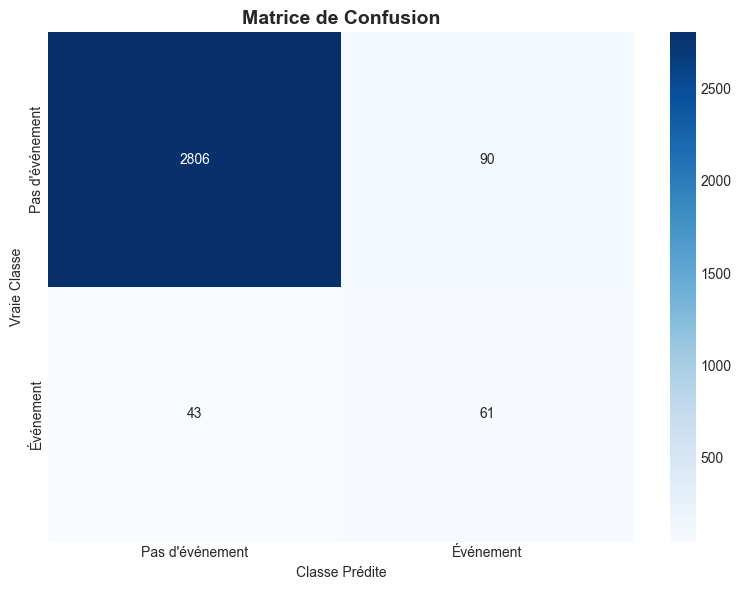

In [35]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pas d'événement", "Événement"],
    yticklabels=["Pas d'événement", "Événement"],
)
plt.title("Matrice de Confusion", fontsize=14, fontweight="bold")
plt.ylabel("Vraie Classe")
plt.xlabel("Classe Prédite")
plt.tight_layout()
plt.show()

## 8. Feature Importance

In [36]:
print(" Analyse des features importantes...")

# Feature importance
feature_importance = pd.DataFrame(
    {"feature": features_df_scaled.columns, "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

print("\nTop 15 features les plus importantes:")
display(feature_importance.head(15))

 Analyse des features importantes...

Top 15 features les plus importantes:


,feature,importance
22,simulation_pret_immobilier,0.348744
19,augmentation_epargne_recente,0.217301
0,age,0.088685
6,anciennete_banque_mois,0.037981
7,revenu_mensuel,0.037721
15,ratio_depenses_revenus,0.035842
8,epargne_totale,0.034712
13,montant_moyen_transactions,0.031887
14,nb_transactions_mois,0.027242
12,nb_connexions_mois,0.023945


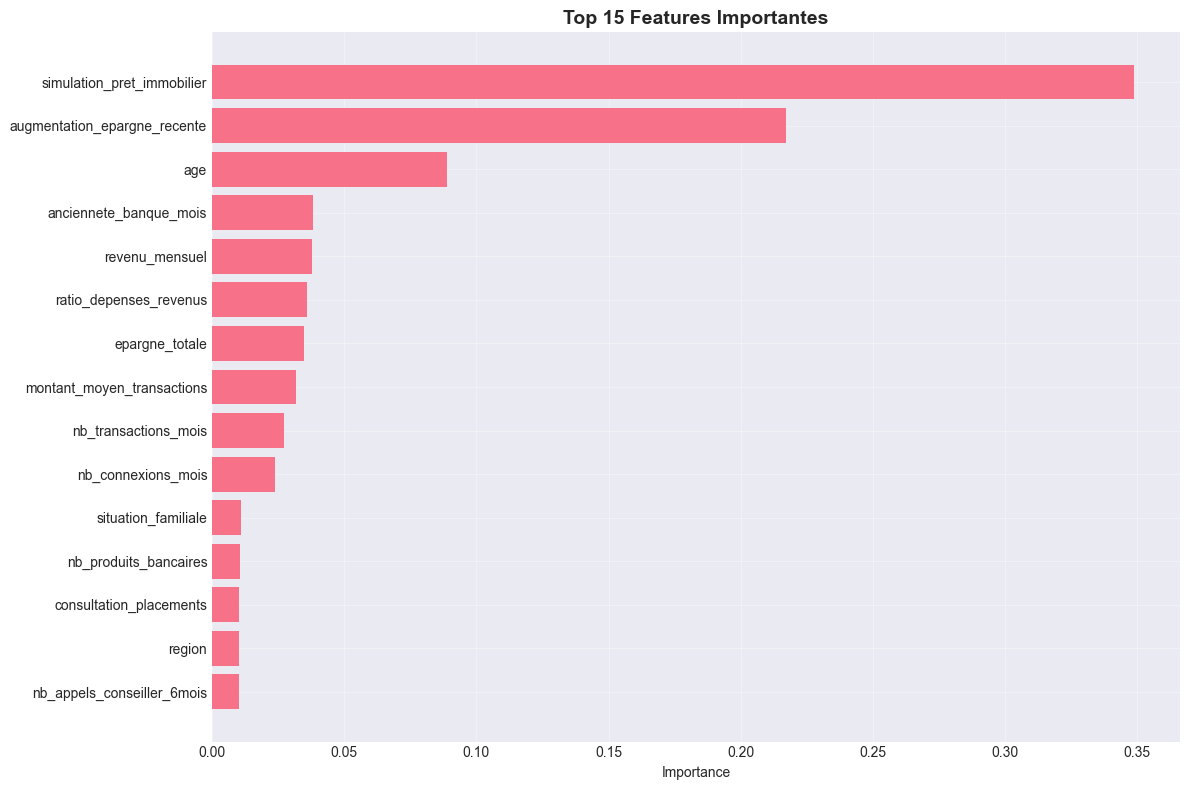

In [37]:
# Visualisation des top features
plt.figure(figsize=(12, 8))
top_15_features = feature_importance.head(15)
plt.barh(range(len(top_15_features)), top_15_features["importance"])
plt.yticks(range(len(top_15_features)), top_15_features["feature"])
plt.xlabel("Importance")
plt.title("Top 15 Features Importantes", fontsize=14, fontweight="bold")
plt.grid(True, alpha=0.3)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 9. Sauvegarde des Résultats

In [38]:
print(" Sauvegarde des résultats...")
feature_importance.to_csv("../data/feature_importance.csv", index=False)
print("    feature_importance.csv sauvegardé")

print("\n Analyse exploratoire terminée avec succès!")

 Sauvegarde des résultats...
    feature_importance.csv sauvegardé

 Analyse exploratoire terminée avec succès!


## 10. Recommandations

### Prochaines étapes :
1. Tester différents modèles (XGBoost, LightGBM, Neural Networks)
2. Optimiser les hyperparamètres
3. Créer des features d'interaction
4. Implémenter une validation croisée stratifiée
5. Analyser les erreurs de prédiction
6. Développer des modèles spécifiques pour chaque moment de vie